# WK-cities Dataset

## Property characteristics only

### Data import and drop unnecessary columns

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

wk_cities = pd.read_csv('./Data/WK_cities.csv', dtype={'plz': object, 'zimmeranzahl': object, 'click_customer': object})

df_wk_cities = pd.DataFrame(wk_cities)

#All columns sorted by category
#Independent and dependent variabels, columns which will not be dropped: edat, zimmeranzahl, schlafzimmer, badezimmer, wohnflaeche, grundstuecksflaeche, objektzustand, parkplatz, price_sqm, kaufpreis
time_information = ['adat']
object_features = ['ausstattung', 'balkon', 'denkmalobjekt', 'einbaukueche', 'etage', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Wohnung', 'keller']
general_object_information = ['anzahletagen', 'bauphase', 'einliegerwohnung', 'immobilientyp', 'nebenraeume', 'rollstuhlgerecht', 'wohngeld']
area_information = ['grundstuecksflaeche', 'nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'energieeffizienzklasse', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'spell', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']

columns_to_drop = time_information + object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_wk_cities.drop(columns=columns_to_drop, axis=1, inplace=True)

print(df_wk_cities.shape)
df_wk_cities.describe(include='all')

(927319, 13)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,objektzustand,edat,price_sqm
count,9.273190e+05,927319,9.273190e+05,793327.000000,927319.000000,927319,927319,927319,927319,927319,927319,927319,927319.000000
unique,NaN,2317,NaN,NaN,NaN,44,18,8,3,3,11,192,NaN
top,NaN,10245,NaN,NaN,NaN,3,Other missing,1,No,Other missing,Not specified,2022m12,NaN
freq,NaN,5888,NaN,NaN,NaN,313604,361803,513075,393133,692545,266277,10767,NaN
mean,8.222709e+07,NaN,2.942670e+05,1970.057329,83.275360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3428.995769
std,2.903465e+07,NaN,2.382443e+05,38.522585,33.938178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180.835325
min,6.745100e+06,NaN,1.610000e+04,1500.000000,24.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397.826080
25%,5.744410e+07,NaN,1.210000e+05,1954.000000,59.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1778.947400
50%,7.736723e+07,NaN,2.290000e+05,1973.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911.504400
75%,1.072567e+08,NaN,3.950000e+05,2002.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.000000


### Data Cleaning of relevant columns

In [73]:
df_wk_cities['edat_year'] = df_wk_cities['edat'].astype(str).str[:4]
df_wk_cities['edat_year'] = pd.to_numeric(df_wk_cities['edat_year'])

df_original = df_wk_cities.copy(deep=True)

df_characteristics = df_original[df_original['baujahr'].notna()]
df_characteristics['age'] = df_characteristics['edat_year'] - df_characteristics['baujahr']

df_characteristics = df_characteristics[df_characteristics['zimmeranzahl'].notna()]
df_characteristics = df_characteristics[~df_characteristics['zimmeranzahl'].str.contains("Implausible value")]
df_characteristics['zimmeranzahl'] = pd.to_numeric(df_characteristics['zimmeranzahl'])
df_characteristics = df_characteristics[(df_characteristics['zimmeranzahl'] > 0) & (df_characteristics['zimmeranzahl'] < 30)]

df_characteristics = df_characteristics[df_characteristics['schlafzimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Implausible value")]
df_characteristics['schlafzimmer'] = pd.to_numeric(df_characteristics['schlafzimmer'])
df_characteristics = df_characteristics[(df_characteristics['schlafzimmer'] > 0) & (df_characteristics['schlafzimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['badezimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Implausible value")]
df_characteristics['badezimmer'] = pd.to_numeric(df_characteristics['badezimmer'])
df_characteristics = df_characteristics[(df_characteristics['badezimmer'] > 0) & (df_characteristics['badezimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['wohnflaeche'].notna()]
df_characteristics['wohnflaeche'] = pd.to_numeric(df_characteristics['wohnflaeche'])
df_characteristics = df_characteristics[(df_characteristics['wohnflaeche'] > 0) & (df_characteristics['wohnflaeche'] < 5000)]
df_characteristics['wohnflaeche'] = np.log(df_characteristics['wohnflaeche'])

df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("Not specified")]
df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("By arrangement")]
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].astype('category')
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.codes

df_characteristics['aufzug'] = df_characteristics['parkplatz'].str.replace('Other missing', 'No')
df_characteristics['aufzug'] = df_characteristics['aufzug'].astype('category')
df_characteristics['aufzug'] = df_characteristics['aufzug'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['aufzug'] = df_characteristics['aufzug'].cat.codes

#Filter for additional model with only one postal code as a sample
#df_characteristics = df_characteristics[df_characteristics['plz'] == '50859']

from pathlib import Path
filepath = Path('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')
df_characteristics.to_csv(filepath)

print(df_characteristics.shape)
df_characteristics.head()

(417789, 15)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,objektzustand,edat,price_sqm,edat_year,age
0,43723127,22145,77000.0,1970.0,3.806662,2.0,1,1,1,Yes,8,2007m11,1711.1111,2007,37.0
2,40715956,22119,126000.0,1959.0,4.343805,3.5,2,1,0,Other missing,3,2007m3,1636.3636,2007,48.0
6,41787125,20144,150500.0,1929.0,4.488636,4.0,3,1,0,Other missing,5,2007m6,1691.0112,2007,78.0
8,41261600,22119,95000.0,1960.0,3.526361,2.0,1,1,1,Yes,3,2007m5,2794.1177,2007,47.0
9,42684820,22763,398000.0,2000.0,4.615121,4.0,3,2,1,Yes,5,2007m8,3940.5940,2007,7.0


### Overview of the sample

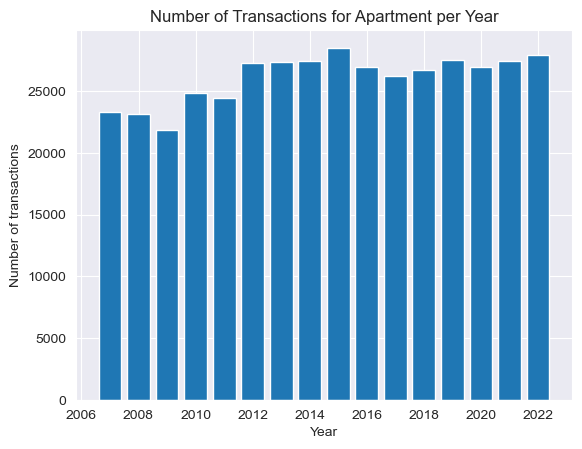

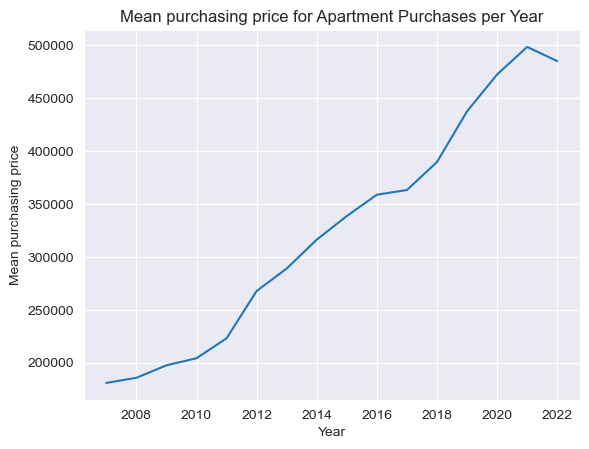

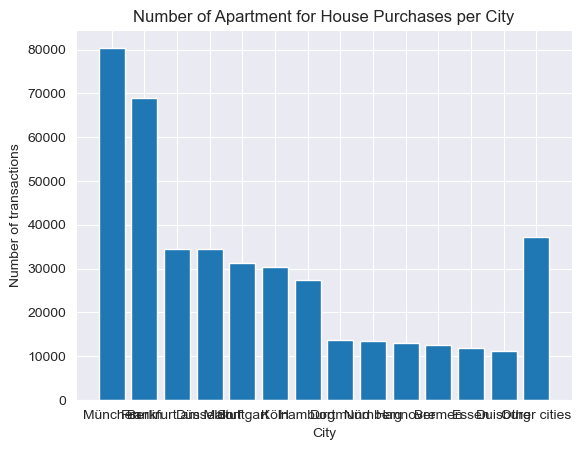

In [74]:
df_data_overview = df_characteristics.copy(deep=True)
number_of_transactions_per_year = df_data_overview.groupby('edat_year')['price_sqm'].count()
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for Apartment per Year')
plt.show()

average_price_sqm_per_year = df_data_overview.groupby('edat_year')['kaufpreis'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean purchasing price')
plt.title('Mean purchasing price for Apartment Purchases per Year')
plt.show()


plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = pd.DataFrame(plz_city)

df_data_overview = pd.merge(df_data_overview, df_plz_city, how="left", on="plz")

big_cities = ['Hamburg', 'Hannover', 'Bremen', 'Düsseldorf', 'Essen', 'Duisburg', 'Köln', 'Dortmund', 'Frankfurt am Main', 'Stuttgart', 'München', 'Nürnberg', 'Berlin', 'Dresden', 'Leizig']
df_big_cities = df_data_overview[df_data_overview['ort'].isin(big_cities)]
df_not_big_cities = df_data_overview[~df_data_overview['ort'].isin(big_cities)]
number_of_transaction_not_big_cities = df_not_big_cities['obid'].count()
number_of_transactions_big_cities = df_big_cities['obid'].count()

count_by_ort = df_big_cities.groupby('ort')['obid'].count().sort_values(ascending=False).reset_index(name='transactions')
new_row = {'ort': 'Other cities', 'transactions': number_of_transaction_not_big_cities}
count_by_ort.loc[len(count_by_ort)] = new_row

plt.bar(count_by_ort['ort'], count_by_ort['transactions'])
plt.xlabel("City")
plt.ylabel('Number of transactions')
plt.title('Number of Apartment for House Purchases per City')
plt.show()

## Macroeconomic factors monthly data

### Merge interest rate

In [75]:
def convert_date(x):
    date_string = str(x)
    date_int = int(date_string.split('m')[-1])
    if (date_int < 10):
        date = '0' + str(date_int)
    else:
        date = str(date_int)
    year = date_string.split('m')[0]
    new_date = year + '-' + date
    return new_date

df_original['date_month'] = df_original.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['obid', 'plz', 'baujahr', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'objektzustand', 'edat', 'edat_year', 'aufzug'], axis=1, inplace=True)
df_original = df_original.groupby('date_month', as_index=False).mean().sort_values('date_month')

def convert_date_interest(x):
    date_string = str(x)
    new_date = date_string[:-3]
    return new_date

interest_rate = pd.read_csv('./Data/Macroeconomic Data/Interest-rate-monthly.csv')
df_interest_rate = pd.DataFrame(interest_rate)
df_interest_rate['date_month'] = df_interest_rate.apply(lambda x: convert_date_interest(x['date']), axis=1)
df_interest_rate.drop(columns=['date'])
df_original = pd.merge(df_original, df_interest_rate, how="inner", on="date_month")

df_original.head()

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_40938/261474122.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_original = df_original.groupby('date_month', as_index=False).mean().sort_values('date_month')


,date_month,kaufpreis,price_sqm,date,interest_rate
0,2007-01,164862.335721,1913.462606,2007-01-01,4.016818
1,2007-02,166746.220182,1956.064051,2007-02-01,4.049000
2,2007-03,168335.870210,1941.587012,2007-03-01,3.940909
3,2007-04,162108.376272,1900.166059,2007-04-01,4.152105
4,2007-05,163091.411524,1918.947846,2007-05-01,4.279048


### Merge construction investment and household income

In [76]:
construction_investment = pd.read_csv('./Data/Macroeconomic Data/Construction-investment.csv')
df_construction_investment_original = pd.DataFrame(construction_investment)
df_construction_investment = pd.DataFrame(np.repeat(df_construction_investment_original.values, 3, axis=0))
df_construction_investment.columns = df_construction_investment_original.columns

def rowIndex(row):
    return row.name

def add_month(date_quarter, rowIndex):
    if (rowIndex % 12 == 0):
        month = '01'
    elif (rowIndex % 12 == 1):
        month = '02'
    elif (rowIndex % 12 == 2):
        month = '03'
    elif (rowIndex % 12 == 3):
        month = '04'
    elif (rowIndex % 12 == 4):
        month = '05'
    elif (rowIndex % 12 == 5):
        month = '06'
    elif (rowIndex % 12 == 6):
        month = '07'
    elif (rowIndex % 12 == 7):
        month = '08'
    elif (rowIndex % 12 == 8):
        month = '09'
    elif (rowIndex % 12 == 9):
        month = '10'
    elif (rowIndex % 12 == 10):
        month = '11'
    elif (rowIndex % 12 == 11):
        month = '12'
    else:
        month = '0'
        
    date_string = str(date_quarter)
    year = date_string.split('-')[0]
    date_month = year + '-' + month
    return date_month

df_construction_investment['rowIndex'] = df_construction_investment.apply(rowIndex, axis=1)
df_construction_investment['date_month'] = df_construction_investment.apply(lambda x: add_month(x.date_quarter, x.rowIndex), axis = 1)
df_construction_investment.drop(columns=['date_quarter', 'rowIndex'], axis=1, inplace=True)
df_original = pd.merge(df_original, df_construction_investment, how="inner", on="date_month")

household_income = pd.read_csv('./Data/Macroeconomic Data/Disposable-income.csv')
df_household_income_original = pd.DataFrame(household_income)
df_household_income = pd.DataFrame(np.repeat(df_household_income_original.values, 3, axis=0))
df_household_income.columns = df_household_income_original.columns

df_household_income['rowIndex'] = df_household_income.apply(rowIndex, axis=1)
df_household_income['date_month'] = df_household_income.apply(lambda x: add_month(x.date_quarter, x.rowIndex), axis = 1)
df_household_income['disposable_income'] = df_household_income['disposable_income'].div(3)
df_household_income.drop(columns=['date_quarter', 'rowIndex'], axis=1, inplace=True)
df_original = pd.merge(df_original, df_household_income, how="inner", on="date_month")

df_original['disposable_income'] = pd.to_numeric(df_original['disposable_income'])
df_original['housing_construction_investment'] = pd.to_numeric(df_original['housing_construction_investment'])

df_original.head()

,date_month,kaufpreis,price_sqm,date,interest_rate,housing_construction_investment,disposable_income
0,2007-01,164862.335721,1913.462606,2007-01-01,4.016818,5.410,125.261333
1,2007-02,166746.220182,1956.064051,2007-02-01,4.049000,5.410,125.261333
2,2007-03,168335.870210,1941.587012,2007-03-01,3.940909,5.410,125.261333
3,2007-04,162108.376272,1900.166059,2007-04-01,4.152105,5.141,123.930000
4,2007-05,163091.411524,1918.947846,2007-05-01,4.279048,5.141,123.930000


### Clean unemployment and merge

In [77]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)


def convert_date_unemployment(x):
    date_string = str(x)
    date = date_string.split('-')[-1]
    
    if (date == 'Januar'):
        month = '01'
    elif (date == 'Februar'):
        month = '02'
    elif (date == 'März'):
        month = '03'
    elif (date == 'April'):
        month = '04'
    elif (date == 'Mai'):
        month = '05'
    elif (date == 'Juni'):
        month = '06'
    elif (date == 'Juli'):
        month = '07'
    elif (date == 'August'):
        month = '08'
    elif (date == 'September'):
        month = '09'
    elif (date == 'Oktober'):
        month = '10'
    elif (date == 'November'):
        month = '11'
    elif (date == 'Dezember'):
        month = '12'
    else:
        date = '0'
    year = date_string.split('-')[0]
    new_date = year + '-' + month
    return new_date

df_unemployment_rate['rowIndex'] = df_unemployment_rate.apply(rowIndex, axis=1)
df_unemployment_rate['date_month'] = df_unemployment_rate.apply(lambda x: convert_date_unemployment(x['Jahr_Monat']), axis = 1)
df_unemployment_rate.drop(columns=['Erwerbspersonen', 'Erwerbstätige', 'Erwerbslose', 'Jahr_Monat', 'rowIndex'], axis=1, inplace=True)

df_unemployment_rate
df_original = pd.merge(df_original, df_unemployment_rate, how="inner", on="date_month")

df_original.head()

,date_month,kaufpreis,price_sqm,date,interest_rate,housing_construction_investment,disposable_income,Erwerbslosenquote
0,2007-01,164862.335721,1913.462606,2007-01-01,4.016818,5.410,125.261333,9.3
1,2007-02,166746.220182,1956.064051,2007-02-01,4.049000,5.410,125.261333,9.1
2,2007-03,168335.870210,1941.587012,2007-03-01,3.940909,5.410,125.261333,9.0
3,2007-04,162108.376272,1900.166059,2007-04-01,4.152105,5.141,123.930000,8.9
4,2007-05,163091.411524,1918.947846,2007-05-01,4.279048,5.141,123.930000,8.8


### Clean planning permissions and merge

In [78]:
planning_permissions = pd.read_csv('./Data/Macroeconomic Data/Planning-permissions.csv')
df_planning_permissions_original = pd.DataFrame(planning_permissions)

df_planning_permissions = pd.DataFrame(np.repeat(df_planning_permissions_original.values, 12, axis=0))
df_planning_permissions.columns = df_planning_permissions_original.columns

def rowIndex(row):
    return row.name
df_planning_permissions['rowIndex'] = df_planning_permissions.apply(rowIndex, axis=1)

def add_month(date_quarter, rowIndex):
    if (rowIndex % 12 == 0):
        month = '01'
    elif (rowIndex % 12 == 1):
        month = '02'
    elif (rowIndex % 12 == 2):
        month = '03'
    elif (rowIndex % 12 == 3):
        month = '04'
    elif (rowIndex % 12 == 4):
        month = '05'
    elif (rowIndex % 12 == 5):
        month = '06'
    elif (rowIndex % 12 == 6):
        month = '07'
    elif (rowIndex % 12 == 7):
        month = '08'
    elif (rowIndex % 12 == 8):
        month = '09'
    elif (rowIndex % 12 == 9):
        month = '10'
    elif (rowIndex % 12 == 10):
        month = '11'
    elif (rowIndex % 12 == 11):
        month = '12'
    else:
        month = '0'
        
    date_string = str(date_quarter)
    year = date_string.split('-')[0]
    date_month = year + '-' + month
    return date_month

df_planning_permissions['date_month'] = df_planning_permissions.apply(lambda x: add_month(x.Jahr, x.rowIndex), axis = 1)

df_planning_permissions.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)
df_planning_permissions['Baugenehmigungen'] = df_planning_permissions['Baugenehmigungen'].div(12)

df_original = pd.merge(df_original, df_planning_permissions, how="inner", on="date_month")

df_original.head()

,date_month,kaufpreis,price_sqm,date,interest_rate,housing_construction_investment,disposable_income,Erwerbslosenquote,Baugenehmigungen
0,2007-01,164862.335721,1913.462606,2007-01-01,4.016818,5.410,125.261333,9.3,15.166667
1,2007-02,166746.220182,1956.064051,2007-02-01,4.049000,5.410,125.261333,9.1,15.166667
2,2007-03,168335.870210,1941.587012,2007-03-01,3.940909,5.410,125.261333,9.0,15.166667
3,2007-04,162108.376272,1900.166059,2007-04-01,4.152105,5.141,123.930000,8.9,15.166667
4,2007-05,163091.411524,1918.947846,2007-05-01,4.279048,5.141,123.930000,8.8,15.166667


### Clean GDP per capita and merge

In [79]:
gdp_per_capita = pd.read_csv('./Data/Macroeconomic Data/GDP-per-capita.csv')
df_gdp_per_capita_original = pd.DataFrame(gdp_per_capita)

df_gdp_per_capita = pd.DataFrame(np.repeat(df_gdp_per_capita_original.values, 12, axis=0))
df_gdp_per_capita.columns = df_gdp_per_capita_original.columns

def rowIndex(row):
    return row.name
df_gdp_per_capita['rowIndex'] = df_gdp_per_capita.apply(rowIndex, axis=1)

def add_month(date_quarter, rowIndex):
    if (rowIndex % 12 == 0):
        month = '01'
    elif (rowIndex % 12 == 1):
        month = '02'
    elif (rowIndex % 12 == 2):
        month = '03'
    elif (rowIndex % 12 == 3):
        month = '04'
    elif (rowIndex % 12 == 4):
        month = '05'
    elif (rowIndex % 12 == 5):
        month = '06'
    elif (rowIndex % 12 == 6):
        month = '07'
    elif (rowIndex % 12 == 7):
        month = '08'
    elif (rowIndex % 12 == 8):
        month = '09'
    elif (rowIndex % 12 == 9):
        month = '10'
    elif (rowIndex % 12 == 10):
        month = '11'
    elif (rowIndex % 12 == 11):
        month = '12'
    else:
        month = '0'
        
    date_string = str(date_quarter)
    year = date_string.split('-')[0]
    date_month = year + '-' + month
    return date_month

df_gdp_per_capita['date_month'] = df_gdp_per_capita.apply(lambda x: add_month(x.Jahr, x.rowIndex), axis = 1)
df_gdp_per_capita['BIP_pro_kopf'] = df_gdp_per_capita['BIP_pro_kopf'].div(12)
df_gdp_per_capita.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)

df_original = pd.merge(df_original, df_gdp_per_capita, how="inner", on="date_month")

df_original['disposable_income'] = np.log(df_original['disposable_income'])
df_original['Baugenehmigungen'] = np.log(df_original['Baugenehmigungen'])
df_original['BIP_pro_kopf'] = np.log(df_original['BIP_pro_kopf'])

filepath = Path('./Data/Cleaned-Datasets/WK_macro_factors_cleaned.csv')
df_original.to_csv(filepath)

print(len(df_original.index) / 12)
df_original.head()

16.0


,date_month,kaufpreis,price_sqm,date,interest_rate,housing_construction_investment,disposable_income,Erwerbslosenquote,Baugenehmigungen,BIP_pro_kopf
0,2007-01,164862.335721,1913.462606,2007-01-01,4.016818,5.410,4.830402,9.3,2.7191,7.852374
1,2007-02,166746.220182,1956.064051,2007-02-01,4.049000,5.410,4.830402,9.1,2.7191,7.852374
2,2007-03,168335.870210,1941.587012,2007-03-01,3.940909,5.410,4.830402,9.0,2.7191,7.852374
3,2007-04,162108.376272,1900.166059,2007-04-01,4.152105,5.141,4.819717,8.9,2.7191,7.852374
4,2007-05,163091.411524,1918.947846,2007-05-01,4.279048,5.141,4.819717,8.8,2.7191,7.852374


## Characteristics and Macroeconomic factors combined

### Merge of characteristics and macroeconomic factors dataset

In [80]:
df_both_factors = df_characteristics.copy(deep=True)

def convert_date(x):
    date_string = str(x)
    date_int = int(date_string.split('m')[-1])
    if (date_int < 10):
        date = '0' + str(date_int)
    else:
        date = str(date_int)
    year = date_string.split('m')[0]
    new_date = year + '-' + date
    return new_date


df_both_factors['date_month'] = df_both_factors.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['kaufpreis', 'price_sqm'], axis=1, inplace=True)
df_both_factors = pd.merge(df_both_factors, df_original, how="left", on="date_month")

filepath = Path('./Data/Cleaned-Datasets/WK_both_factors_cleaned.csv')
df_both_factors.to_csv(filepath)

print(df_both_factors.shape)
df_both_factors.head()

(417789, 23)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,...,edat_year,age,date_month,date,interest_rate,housing_construction_investment,disposable_income,Erwerbslosenquote,Baugenehmigungen,BIP_pro_kopf
0,43723127,22145,77000.0,1970.0,3.806662,2.0,1,1,1,Yes,...,2007,37.0,2007-11,2007-11-01,4.089091,5.133,4.864738,8.1,2.7191,7.852374
1,40715956,22119,126000.0,1959.0,4.343805,3.5,2,1,0,Other missing,...,2007,48.0,2007-03,2007-03-01,3.940909,5.410,4.830402,9.0,2.7191,7.852374
2,41787125,20144,150500.0,1929.0,4.488636,4.0,3,1,0,Other missing,...,2007,78.0,2007-06,2007-06-01,4.560476,5.141,4.819717,8.6,2.7191,7.852374
3,41261600,22119,95000.0,1960.0,3.526361,2.0,1,1,1,Yes,...,2007,47.0,2007-05,2007-05-01,4.279048,5.141,4.819717,8.8,2.7191,7.852374
4,42684820,22763,398000.0,2000.0,4.615121,4.0,3,2,1,Yes,...,2007,7.0,2007-08,2007-08-01,4.296522,5.148,4.827655,8.4,2.7191,7.852374
